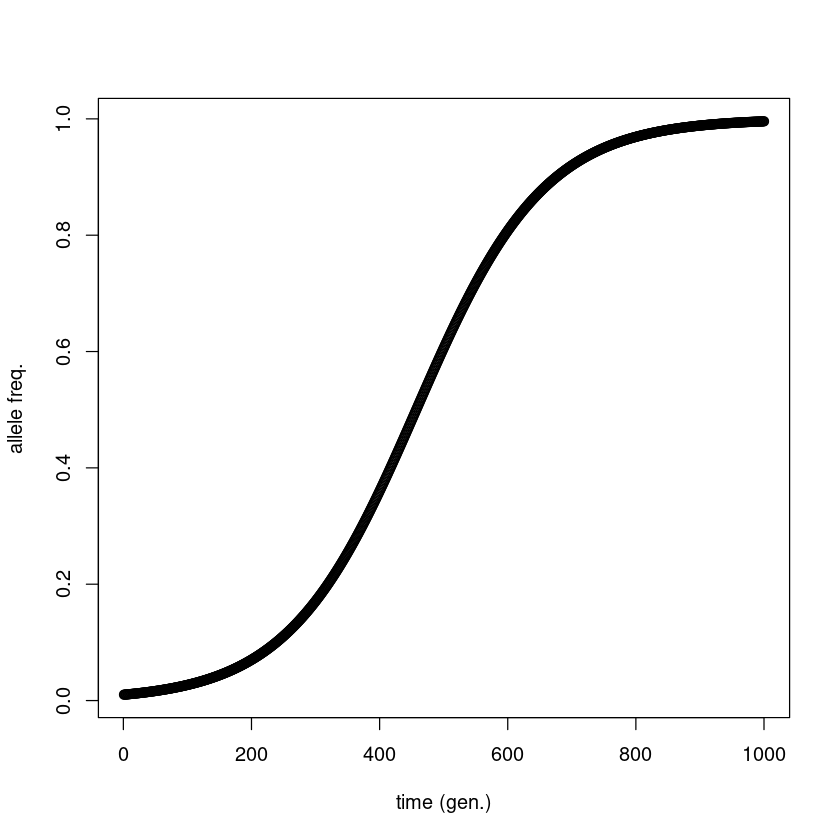

In [9]:
# 1) changes in allele frequency

# generations
t <- 1:1000

# initial allele frequency
f0 <- 0.01

# selection coefficient
s <- 0.01
    
plot(f0/(f0+(1-s)^t*(1-f0)), xlab="time (gen.)", ylab="allele freq.")

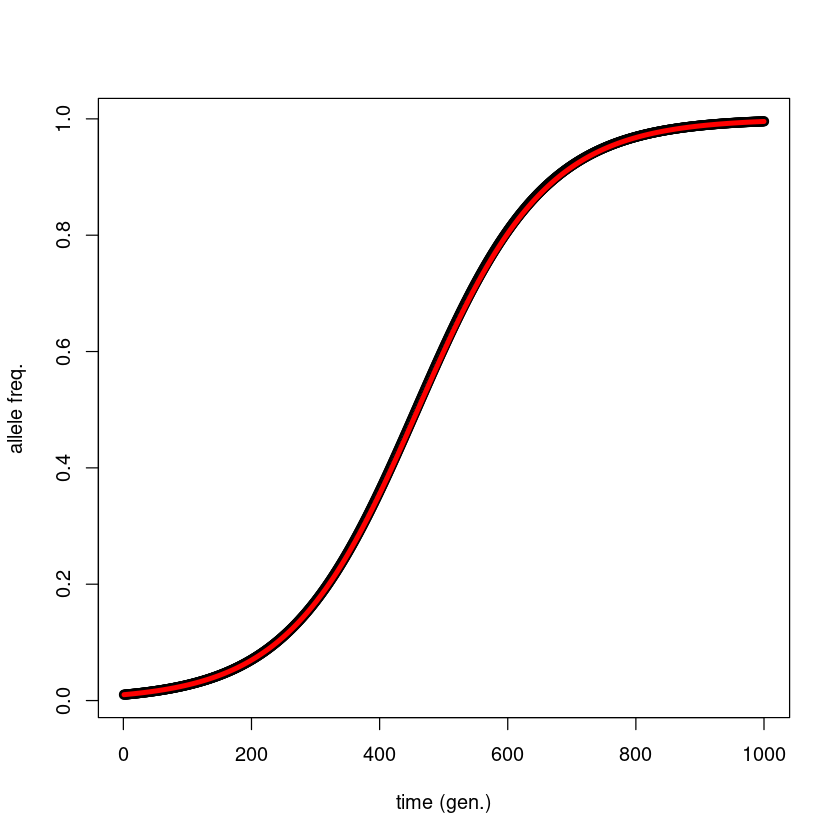

In [10]:
# 2) exponential

plot(f0/(f0+(1-s)^t*(1-f0)), xlab="time (gen.)", ylab="allele freq.")
lines(f0/(f0+exp(-s*t)*(1-f0)), type="l", col="red", lwd=4)


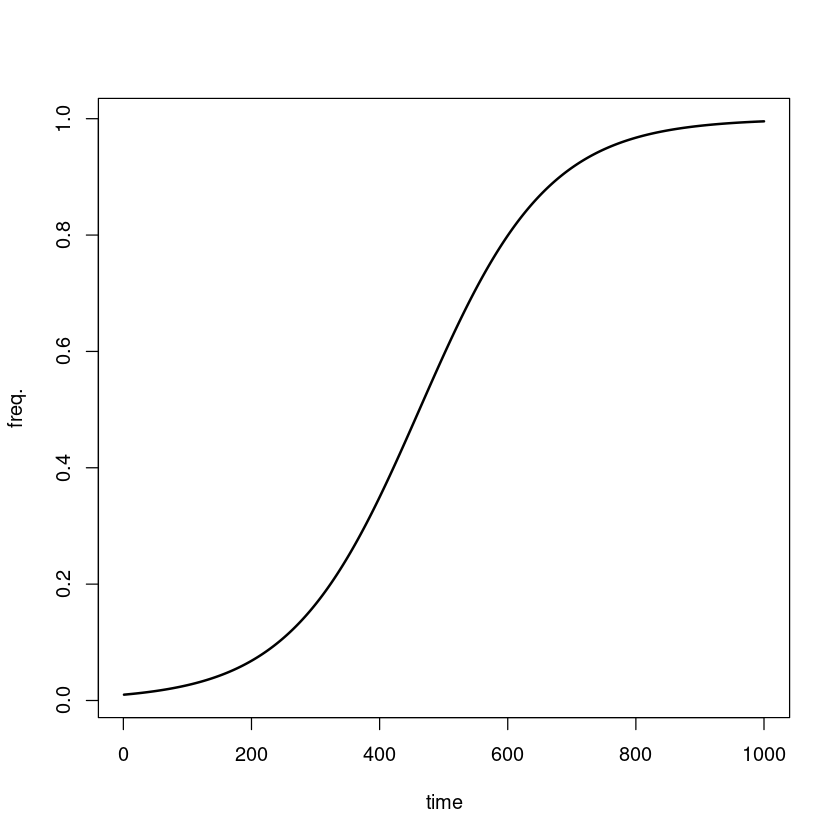

In [11]:
# 3) additive

f <- rep(0,1000) 

s <- 0.01
f[1] <- 0.01

for (t in 2:1000) f[t] <- f[t-1] + s*f[t-1]*(1-f[t-1])
plot(f, type="l", xlab="time", ylab="freq.", lwd=2)


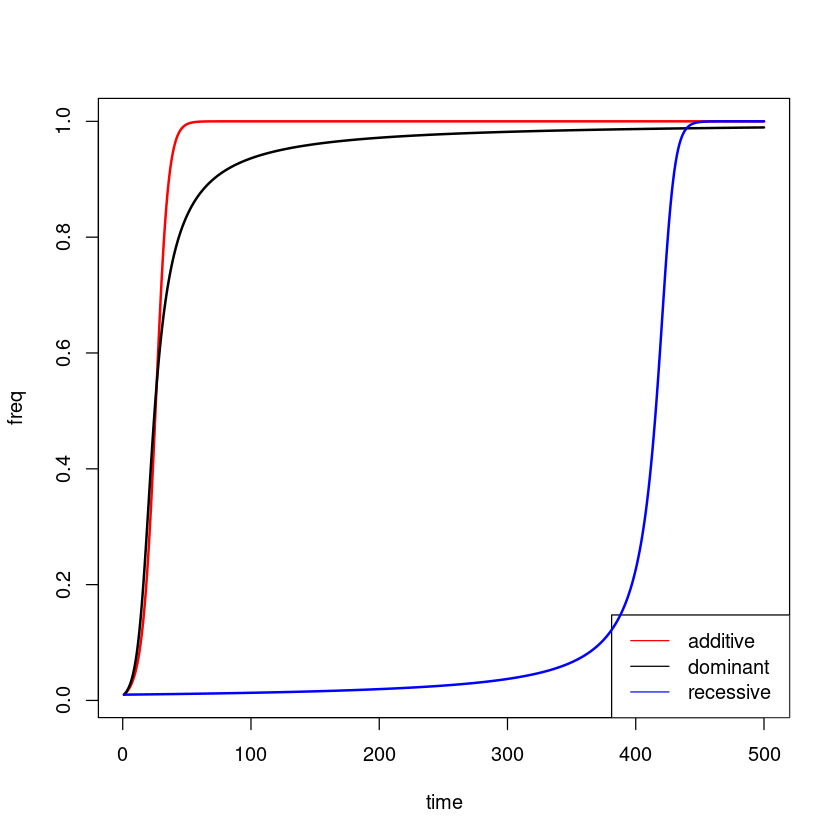

In [12]:
# 4) directional selection

s <- 0.2;

## additive
f=rep(0,500); f[1]=0.01
for (t in 2:500) f[t] = f[t-1] + s*f[t-1]*(1-f[t-1])
plot(f, type="l", col="red", xlab="time", ylab="freq", lwd=2)
legend("bottomright", col=c("red","black","blue"), legend=c("additive", "dominant", "recessive"), lty=1  )

## dominant
f=rep(0,500); f[1]=0.01
for (t in 2:500) f[t] = f[t-1] + s*f[t-1]*(1-f[t-1])^2 / (1 - s*(1-f[t-1]^2))
lines(f, type="l", col="black", lwd=2)

## recessive
f=rep(0,500); f[1]=0.01
for (t in 2:500) f[t] = f[t-1] + (s*(f[t-1])^2*(1-f[t-1])) / (1 - s*(2*f[t-1]*(1-f[t-1]) + (1-f[t-1])^2))
lines(f, type="l", col="blue", lwd=2)


In [13]:
# 5) selection and drift

simulateTrajectory <- function(s, N, t=500, nrepl=100) {

        cat("2Ns =",2*N*s,"\n")

        # initialise frequencies
        fA <- matrix(NA, nrow=nrepl, ncol=t)
        fA[,1] <- 1/(2*N)

        # viability
        vAA <- 1
        vAa <- 1 - s
        vaa <- 1 - (2*s)

        for (r in 1:nrepl) {

                for (i in 2:t) {

                        # selection
                        fpA <- fA[r,i-1] * (2*vAA*fA[r,i-1] + (vAa*(1-fA[r,i-1]))) / (vAA*fA[r,i-1]^2 + 2*vAa*fA[r,i-1]*(1-fA[r,i-1]) + vaa*(1-fA[r,i-1])^2)

                        if (fpA <= 0) { fA[r,i:t] <- 0; break} # lost
                        if (fpA >= 1) { fA[r,i:t] <- 1; break} # fixed

                        # drift
                        fA[r,i] <- sum(sample(x=c(0,1), size=(2*N), replace=T, prob=c((1-fpA),fpA))) / (2*N)

                }

        }

        u <- 0
        if ((2*N*s) > -1) u <- 1/(2*N)
        if ((2*N*s) > 1) u <- 2*s
    
        cat("Lost = ", length(which(fA[,t]==0)), "\n")
        cat("Fixed = ", length(which(fA[,t]==1)), "\n")
        #cat("Fixed = ", length(which(fA[,t]==1)), "\t (expected = ", (u*nrepl), ")\n")

        return(invisible(fA));

}




In [14]:
plotTrajectory <- function(fA, ylim=c(0,1), tlim=c(1,NA)) {
        cols <- colors()
        if (is.na(tlim[2])) tlim <- c(1,ncol(fA))
        plot(fA[1,],ylim=ylim,ty="l",xlim=tlim,col=cols[2],xlab="generations",ylab="frequency",lwd=2)
        for (i in 2:nrow(fA)) lines(fA[i,],type="l",col=cols[i+1],lwd=2)
}

2Ns = 100 
Lost =  91 
Fixed =  9 


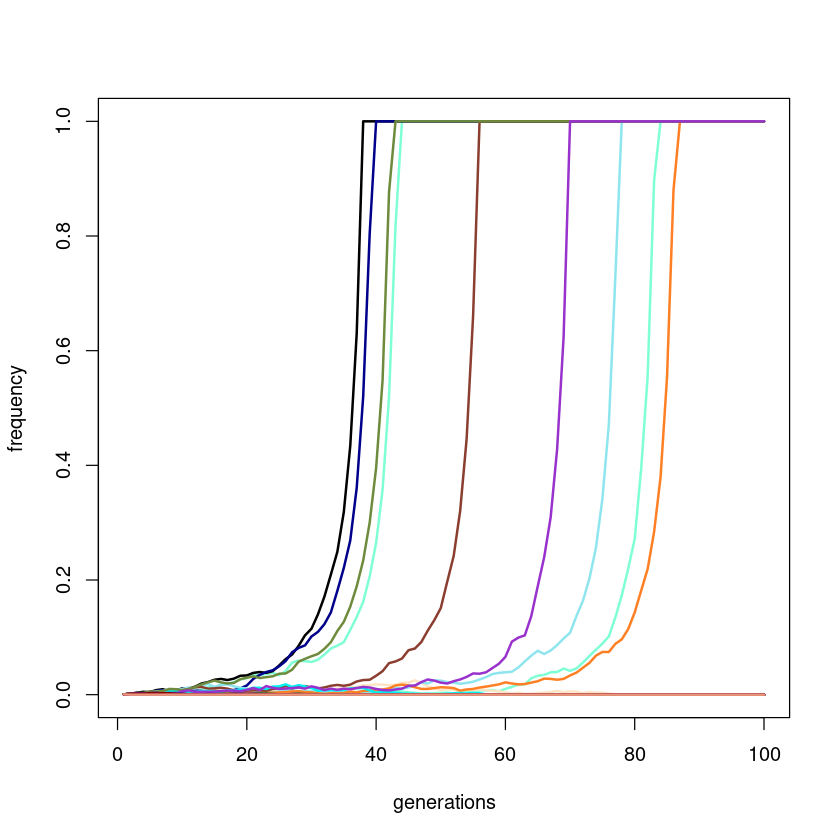

In [18]:
plotTrajectory(simulateTrajectory(s=0.05, N=1000, t=100, nrepl=100))